In [1]:
import pandas as pd
import sklearn.linear_model as ln
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("X_data.csv", index_col="Unnamed: 0", parse_dates=True, sep = ';')
df.index.names = ["Date"]


In [3]:
df.head(7)

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Date,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22
2015-01-01 00:05:00,213,211,211,342,350,346,479,473,482,360,349,354,243,241,242,163.81,9.22
2015-01-01 00:06:00,213,212,211,341,349,346,480,473,482,363,350,354,244,241,242,166.14,9.22


надо бы разбить данные на тренировочные и тестовые

In [4]:
X_train = df.loc[(df.index < "2018-05-03 23:05:00") & (df.index >= "2015-01-03 23:05:00")]
X_train.head(70)

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Date,,,,,,,,,,,,,,,,,
2015-01-03 23:05:00,266,339,263,335,326,341,495,497,535,316,346,336,234,238,239,154.87,4.73
2015-01-03 23:06:00,266,339,263,334,326,341,496,498,537,317,347,336,234,238,239,155.06,4.73
2015-01-03 23:07:00,267,339,263,334,326,341,496,498,538,317,348,336,233,238,239,155.19,4.73
2015-01-03 23:08:00,267,339,263,334,326,341,497,498,540,317,348,336,233,238,239,154.35,4.73
2015-01-03 23:09:00,267,340,263,334,326,342,497,498,542,317,349,336,233,238,240,153.78,4.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-04 00:10:00,277,322,273,321,334,353,504,501,684,327,381,337,231,236,241,159.23,7.90
2015-01-04 00:11:00,277,322,273,321,334,353,504,501,687,327,381,337,231,236,241,155.84,7.90
2015-01-04 00:12:00,277,321,274,321,334,354,504,501,690,327,382,337,231,236,241,155.62,7.90


Заметим, что в тренировочных данных почему-то данные только с 4 января, а не с начала года. Поэтому отсечём тренировочные "иксы" начиная за час до начала тренировочных "игреков"

In [5]:
Y_train = pd.read_csv("Y_train.csv",names=["Date", "score"], index_col="Date", parse_dates=True, sep = ';')
Y_train.head()

,score
Date,
2015-01-04 00:05:00,392
2015-01-04 01:05:00,384
2015-01-04 02:05:00,393
2015-01-04 03:05:00,399
2015-01-04 04:05:00,400


In [32]:
Y_train.nunique()

score    264
dtype: int64

И тут мы понимаем, что, вероятно, стоит писать нейронку. Ибо быстрый гуглёж показыват, что на таком кол-ве классов рандом форест чувствует себя не очень хорошо

Вроде бы сработало. Аналогично для сабмита:

In [7]:
X_submit = df.loc[(df.index >= "2018-05-03 23:05:00") & (df.index < "2018-12-31 23:05:00")]
X_submit.tail(20)

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Date,,,,,,,,,,,,,,,,,
2018-12-31 22:45:00,271,265,260,357,351,359,481,449,491,325,331,327,277,276,280,157.82,6.13
2018-12-31 22:46:00,271,264,261,357,355,359,481,449,491,325,331,327,277,276,280,157.68,6.13
2018-12-31 22:47:00,271,263,261,357,359,359,481,449,491,325,331,327,277,276,280,159.87,6.13
2018-12-31 22:48:00,271,262,261,357,359,359,481,449,491,325,331,327,277,276,280,161.51,6.13
2018-12-31 22:49:00,271,261,261,357,359,359,481,449,491,325,331,327,277,276,280,159.33,6.13
2018-12-31 22:50:00,271,261,261,357,359,359,481,449,491,325,331,327,277,276,280,158.26,6.13
2018-12-31 22:51:00,271,260,261,357,359,359,481,449,491,325,331,327,277,276,280,161.93,6.13
2018-12-31 22:52:00,271,259,261,357,359,359,481,449,491,325,331,327,277,276,280,157.99,6.13
2018-12-31 22:53:00,271,258,261,357,359,359,481,449,491,325,332,327,277,276,280,161.65,6.13


In [8]:
Y_submit= pd.read_csv("Y_submit.csv",names=["Date", "score"] ,index_col="Date", parse_dates=True, sep = ';', )
Y_submit.tail()

,score
Date,
2018-12-31 19:05:00,420
2018-12-31 20:05:00,420
2018-12-31 21:05:00,420
2018-12-31 22:05:00,420
2018-12-31 23:05:00,420


Препроцессинг данных почти завершён. Теперь закинем всё, что у нас есть в тензоры пайторча. Функцию для этого честно стащим со StackOverflow.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler, Sampler
# determine the supported device
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu') # don't have GPU
    return device

# convert a df to tensor to be used in pytorch
def df_to_tensor(df):
    device = get_device()
    return torch.from_numpy(df.values).float().to(device)

#df_tensor = df_to_tensor(df)
#print(df_tensor)
print(get_device())
device = get_device()

cuda:0


Данные будем хранить на видеокарте.

Закидываем в тензоры всё остальное

In [10]:
X_train_tensor  = df_to_tensor(X_train)
X_submit_tensor = df_to_tensor(X_submit)
Y_train_tensor = df_to_tensor(Y_train)
Y_submit_tensor = df_to_tensor(Y_submit)

Будем считать, что марку определяет вся история данных за последний час. Тогда имеем 60*17 = 1020 чисел — размер вектора для нейронной сети.

In [11]:
print(len(X_train_tensor) / 60)
print(len(Y_train_tensor))
print(len(X_submit_tensor) / 60)
print(len(Y_submit_tensor))

29184.0
29184
5808.0
5808


Для самопроверки, мы ничего не потеряли. Раз мы сказали, что одно число из Y_train определяется 1020 числами из X_train, то разумно решейпнуть тензоры

In [12]:
X_train_tensor = torch.reshape(X_train_tensor, (len(Y_train_tensor), 1020))
X_train_tensor

tensor([[266.0000, 339.0000, 263.0000,  ..., 242.0000, 155.4500,   7.9000],
        [277.0000, 326.0000, 273.0000,  ..., 230.0000, 156.0000,   6.9600],
        [277.0000, 253.0000, 272.0000,  ..., 240.0000, 154.1500,   7.2900],
        ...,
        [259.0000, 255.0000, 260.0000,  ..., 247.0000, 158.8700,   7.6500],
        [260.0000, 254.0000, 263.0000,  ..., 248.0000, 158.6500,   8.9000],
        [255.0000, 255.0000, 260.0000,  ..., 245.0000, 153.7400,   6.3900]],
       device='cuda:0')

сравнивая этот тензор с датафреймом выше, понимаем, что решейп прошёл успешно. делаем, аналогично для X_submit

In [13]:
X_submit_tensor = torch.reshape(X_submit_tensor, (len(Y_submit_tensor), 1020))
X_submit_tensor

tensor([[254.0000, 257.0000, 256.0000,  ..., 236.0000, 157.0500,   6.8100],
        [258.0000, 261.0000, 256.0000,  ..., 236.0000, 155.7000,   7.8900],
        [255.0000, 263.0000, 258.0000,  ..., 255.0000, 156.8800,   6.1600],
        ...,
        [263.0000, 260.0000, 257.0000,  ..., 278.0000, 188.5700,   8.3700],
        [268.0000, 276.0000, 255.0000,  ..., 280.0000, 158.5900,   6.1300],
        [320.0000, 285.0000, 257.0000,  ..., 280.0000, 161.6200,   8.4400]],
       device='cuda:0')

Вроде бы можно начинать писать саму нейронную сеть. Сделаем хорошое дело и создадим свой класс датасета под нашу задачу.

In [14]:
class Dataset(torch.utils.data.Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, data, labels):
        'Initialization'
        self.labels = labels
        self.list_IDs = list(range(len(labels)))
        self.data = data

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_IDs)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.list_IDs[index]

        # Load data and get label
        X = self.data[ID]
        y = self.labels[ID]

        return X, y

По факту следующая клетка кода не используется в финальном варианте исполнения. Она мне была нужна, когда я делал сплит по трейн даным для валидации. Но по итогу валидировался я уже на сабмите. Возможно спорное решение, но детали я опишу в отчёте.

In [15]:
batch_size = 2048

data_size = len(Y_train_tensor)
validation_split = .2
split = int(np.floor(validation_split * data_size))
indices = list(range(data_size))
np.random.shuffle(indices)

train_indices, val_indices = indices[split:], indices[:split]

train_set = Dataset(X_train_tensor, Y_train_tensor)

submit_set = Dataset(X_submit_tensor, Y_submit_tensor)

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                         sampler=val_sampler)


попробуем без валидации на трэйн сете, мб это даст лучшие результаты

In [16]:
batch_size = 4096

data_size = len(Y_train_tensor)
validation_split = .2
split = int(np.floor(validation_split * data_size))
indices = list(range(data_size))
np.random.shuffle(indices)

#train_indices, val_indices = indices[split:], indices[:split]
train_indices = indices
submit_indices = list(range(len(Y_submit_tensor)))
np.random.shuffle(submit_indices)
train_set = Dataset(X_train_tensor, Y_train_tensor)

submit_set = Dataset(X_submit_tensor, Y_submit_tensor)

train_sampler = SubsetRandomSampler(train_indices)
submit_sampler = SubsetRandomSampler(submit_indices)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                           sampler=train_sampler)
submit_loader = torch.utils.data.DataLoader(submit_set, batch_size=batch_size,
                                         sampler=submit_sampler)


По сути следующая клетка — наше поле для экспериментов с гиперпараметрами (не считая размера батча из предыдущей).
*ВАЖНО. В требованиях к выполнению задания была воспроизводимость результатов. Нейросеть я естественно обучал на видеокарте, причём совершенно домашней — GTX 1060 3Gb. Если на компе, на котором это задание будет проверяться не установлен пайторч нужным образом с поддержкой cuda (https://pytorch.org/get-started/locally/), либо на нём нет видеокарты с поддержкой CUDA, либо по ещё каким-то причинам этот код не захочет запускаться, этот ноутбук всегда можно запустить в google colab (https://colab.research.google.com/) и запустить его там. Видеопамяти там ещё больше, чем на моей домашней машинке, так что проблем точно не возникнет, я проверял :)

In [17]:
neurons = 2048
nn_model = nn.Sequential(
    nn.Linear(1020, neurons),
    nn.ReLU(inplace=True),
    nn.BatchNorm1d(neurons),
    nn.Linear(neurons, neurons),
    nn.ReLU(inplace=True),
    nn.BatchNorm1d(neurons),
    nn.Linear(neurons, neurons),
    nn.ReLU(inplace=True),
    #nn.BatchNorm1d(neurons),
    nn.Linear(neurons, neurons),
    nn.ReLU(inplace=True),
    #nn.BatchNorm1d(neurons),
    nn.Linear(neurons, neurons),
    nn.ReLU(inplace=True),
    nn.BatchNorm1d(neurons),
    nn.Linear(neurons, neurons),
    nn.ReLU(inplace=True),
    #nn.BatchNorm1d(neurons),
    nn.Linear(neurons, neurons),
    nn.ReLU(inplace=True),
    #nn.BatchNorm1d(neurons),
    nn.Linear(neurons, neurons),
    nn.ReLU(inplace=True),
    nn.BatchNorm1d(neurons),
    nn.Linear(neurons, neurons),
    nn.ReLU(inplace=True),
   #nn.BatchNorm1d(neurons),
    nn.Linear(neurons, neurons),
    nn.ReLU(inplace=True),
    nn.BatchNorm1d(neurons),
    nn.Linear(neurons, 1)
)
nn_model.type(torch.cuda.FloatTensor)
nn_model.to(device)

loss = nn.L1Loss().type(torch.cuda.FloatTensor)

optimizer = optim.Adam(nn_model.parameters(), lr=7e-1, weight_decay=1e-2, amsgrad = True)
#optimizer = optim.SGD(nn_model.parameters(), lr = 0.5, momentum=0.9, nesterov=True)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1)
scheduler2 = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor = 0.1, patience = 5)

В качестве лосс-функции берём L1loss, что представляет из себя MAE, что потребовал от нас заказчик

In [157]:
def train_model(model, train_loader, val_loader, loss, optimizer, scheduler, scheduler2, num_epochs):
    train_loss_history = []
    val_loss_history = []
    for epoch in range(num_epochs):
        model.train() # Enter train mode

        loss_accum = 0

        for i_step, (x, y) in enumerate(train_loader):
            x_gpu = x.to(device)
            y_gpu = y.to(device)
            prediction = model(x_gpu)
            loss_value = loss(prediction, y_gpu)
            optimizer.zero_grad()
            loss_value.backward()

            optimizer.step()


            loss_accum += float(loss_value)

        ave_loss = loss_accum / (i_step + 1)

        val_loss = compute_accuracy(model, val_loader)

        if (ave_loss < 10) and (val_loss < 10):
            print("Average train loss: %f, Average val loss: %f" % (ave_loss, val_loss))
            print("SUCCESS!")
            torch.save(model.state_dict(), "model.pt") #Сохраняем модельку, если точность нас устраивает
            break #И выходим из цикла
        scheduler.step()
        scheduler2.step(val_loss)

        train_loss_history.append(float(ave_loss))
        val_loss_history.append(float(val_loss))

        print("Average train loss: %f, Average val loss: %f" % (ave_loss, val_loss))

    return train_loss_history, val_loss_history

def compute_accuracy(model, val_loader):
    """
    Computes accuracy on the dataset wrapped in a loader

    Returns: accuracy as a float value between 0 and 1
    """
    model.eval() # Evaluation mode

    loss_accum = 0

    for i_step, (x, y) in enumerate(val_loader):
        x_gpu = x.to(device)
        y_gpu = y.to(device)
        prediction = model(x_gpu)
        loss_value = float(loss(prediction, y_gpu))
        loss_accum += loss_value

    ave_loss = loss_accum / (i_step + 1)


    #raise Exception("Not implemented")

    return ave_loss

#train_loss_history, val_loss_history = train_model(nn_model, train_loader, val_loader, loss, optimizer, scheduler, 200) добавим уменьшение лёрнинг рейта на плато валидационного лосса
train_loss_history, val_loss_history = train_model(nn_model, train_loader, submit_loader, loss, optimizer, scheduler, scheduler2, 50)

Average train loss: 687.680611, Average val loss: 392.035217
Average train loss: 239.293819, Average val loss: 164964.718750
Average train loss: 142.468666, Average val loss: 57179764.000000
Average train loss: 56.729272, Average val loss: 4369.536133
Average train loss: 59.517252, Average val loss: 6452.721436
Average train loss: 66.585455, Average val loss: 27519.580078
Average train loss: 90.525980, Average val loss: 1409.154053
Average train loss: 27.561234, Average val loss: 70.009007
Average train loss: 14.589830, Average val loss: 22.648419
Average train loss: 11.699242, Average val loss: 0.315786
Average train loss: 11.014960, Average val loss: 9.285642
Average train loss: 10.282801, Average val loss: 16.251195
Average train loss: 11.083506, Average val loss: 11.479354
Average train loss: 11.069700, Average val loss: 9.969045
Average train loss: 10.002920, Average val loss: 9.479786
Average train loss: 10.375856, Average val loss: 9.023271
Average train loss: 9.937660, Average 

Следующая строчка кода просто для внезапной очистки памяти на GPU. У меня было всего 3Gb, мне было полезно. Использовать с осторожностью)

In [182]:
#torch.cuda.empty_cache()

Построим графики лосса на валидации и трейне. Удалим несколько первых элементов, ибо там лосс непомерно большой и график будет неинформативный. Индексы для удаления просто на глаз исходя из вывода сверху. Зачастую удаления первых 8 элементов достаточно.

In [94]:
a = train_loss_history
b = val_loss_history

del(a[0:8])
del(b[0:8])

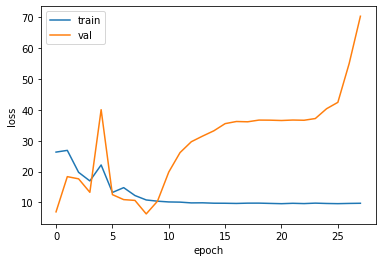

In [95]:


x_axis = list(range(len(a)))
fig, ax = plt.subplots()
ax.plot(x_axis, a, label = "train")
ax.plot(x_axis, b, label = "val")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.legend()
fig.savefig("train_val_loss_3.pdf")

In [162]:
Y_submit_tensor.size()

torch.Size([5808, 1])

Модель натренировали, приступаем к предсказаниям. Сделаем лоадер

In [18]:
nn_model.load_state_dict(torch.load("model_backup.pt"))
nn_model.eval()

#batch_size = len(Y_submit_tensor)
batch_size = 1
predict_indices = list(range(len(Y_submit_tensor)))

predict_set = Dataset(X_submit_tensor, Y_submit_tensor)

predict_sampler = Sampler(submit_indices)

predict_loader = torch.utils.data.DataLoader(predict_set, batch_size=batch_size,
                                            sampler=submit_sampler)
shape = (5808, 1,)
pred_tensor = torch.zeros(shape)
#pred_tensor_gpu = pred_tensor.to(device)

for i_step, (x, y) in enumerate(predict_loader):
    prediction = nn_model(x)
    pred_tensor[i_step, 0] = prediction

pred_tensor

tensor([[416.5745],
        [416.7686],
        [416.8349],
        ...,
        [416.1400],
        [416.9569],
        [416.3790]], grad_fn=<CopySlices>)

а вот и наши долгожданные предикты, теперь добавим их в датафрейм предикта и напечтаем в csv. Посчитаем MAE и пойдём довольные писать отчёт

In [27]:
pred_array = pred_tensor.detach().numpy()
Y_submit["predictions"] = pred_array

Y_submit["absolute error"] = abs(Y_submit.score - Y_submit.predictions)
Y_submit.head()

,score,predictions,absolute error
Date,,,
2018-05-04 00:05:00,420,416.574493,3.425507
2018-05-04 01:05:00,420,416.768585,3.231415
2018-05-04 02:05:00,420,416.834900,3.165100
2018-05-04 03:05:00,420,416.286407,3.713593
2018-05-04 04:05:00,420,416.326874,3.673126


In [28]:
print("MAE: ", Y_submit["absolute error"].mean())

MAE:  3.3932678548429296


In [29]:
Y_submit.to_csv("Y_sub_pred.csv", index = True)